## Importando

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Entendendo as colunas e seus valores

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Variable / Definition / Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)

- 1st = Upper
- 2nd = Middle
- 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Categorical: Survived, Sex, and Embarked
- Ordinal: Pclass
- Continous: Age, Fare
- Discrete: SibSp, Parch

In [6]:
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
273,1165,3,"Lennon, Miss. Mary",female,NaN,1,0,370371,15.5000,NaN,Q
397,1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
55,947,3,"Rice, Master. Albert",male,10.0,4,1,382652,29.1250,NaN,Q
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.7750,NaN,S
309,1201,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S
219,1111,3,"Thomson, Mr. Alexander Morrison",male,NaN,0,0,32302,8.0500,NaN,S
264,1156,2,"Portaluppi, Mr. Emilio Ilario Giuseppe",male,30.0,0,0,C.A. 34644,12.7375,NaN,C
163,1055,3,"Pearce, Mr. Ernest",male,NaN,0,0,343271,7.0000,NaN,S
86,978,3,"Barry, Miss. Julia",female,27.0,0,0,330844,7.8792,NaN,Q


test não possui 'survived'

## Coletando informacoes sobre sobreviventes

In [7]:
train['Survived'].sample(10)

374    0
436    0
360    0
18     0
770    0
203    0
506    1
123    1
869    1
699    0
Name: Survived, dtype: int64

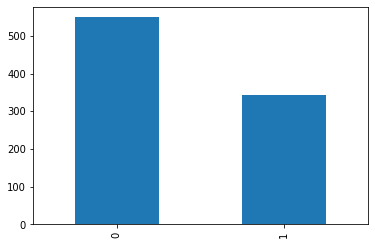

In [8]:
train['Survived'].value_counts().plot(kind='bar')

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
sum = 549 + 342
print("survived {:f}%".format(342/sum))
print("not survived {:f}%".format(549/sum))

survived 0.383838%
not survived 0.616162%


In [11]:
for feature in ['Sex', 'Pclass', 'SibSp', 'Parch']:
    temp = train[[feature, 'Survived']].groupby([feature], as_index=False).mean().sort_values(by='Survived')
    print(temp)
    print('\n')

      Sex  Survived
1    male  0.188908
0  female  0.742038


   Pclass  Survived
2       3  0.242363
1       2  0.472826
0       1  0.629630


   SibSp  Survived
5      5  0.000000
6      8  0.000000
4      4  0.166667
3      3  0.250000
0      0  0.345395
2      2  0.464286
1      1  0.535885


   Parch  Survived
4      4  0.000000
6      6  0.000000
5      5  0.200000
0      0  0.343658
2      2  0.500000
1      1  0.550847
3      3  0.600000




Com uma analise inicial podemos ver que a maioria dos sobreviventes é do sexo feminino, assim como na otica das classes socio-economicas, quanto maior a classe, mais sobreviventes. 

## Correlacoes

In [12]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

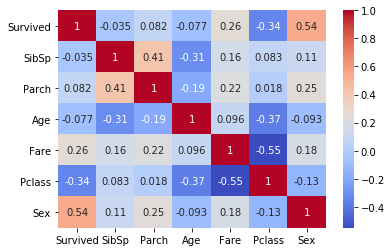

In [13]:
# Correlacoes entre features
sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare", "Pclass", "Sex"]].corr(), annot=True, cmap = "coolwarm")

A maior correlacao positiva com survived é da feature Sex e depois Fare

Excluindo survived, parece existir uma correlacao grande entre SibSp e Parch, o que faz sentido já que as duas features falam sobre parentescos 

Também parece existir uma correlacao negativa alta entre Fare e Pclass.

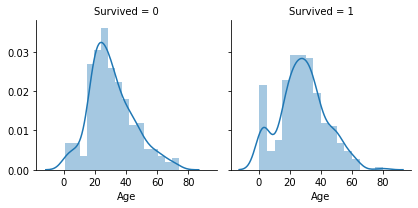

In [14]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(sns.distplot, "Age")

[]

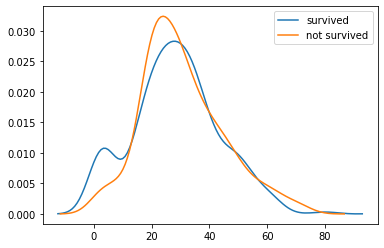

In [26]:
sns.kdeplot(train[train.Survived == 1].Age, label="survived")
sns.kdeplot(train[train.Survived == 0].Age, label="not survived")
plt.plot()

Não é possível concluir muito sobre a idade.

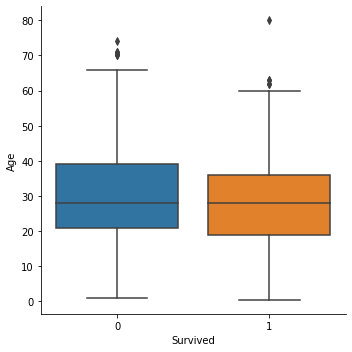

In [15]:
sns.catplot(x="Survived", y="Age", data=train, kind="box")

A mediana é a mesma

## Verificando a divisão da base

In [16]:
# Divisão da base 
train_count = train['PassengerId'].count()
test_count = test['PassengerId'].count()

In [17]:
train_count

891

In [18]:
train_count/(train_count + test_count)

0.680672268907563

In [19]:
test_count/(train_count + test_count)

0.31932773109243695

A base é dividida em 32% teste e 68% treino

## Verificando valores nulos

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64